# emotion detection

** importing libraries**

In [2]:
import matplotlib.pyplot as plt
from glob import glob  #use to list file in that dir
import cv2
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator #create the form of data for model to understand
from tensorflow.keras.layers import  Dense, Input, Dropout, Flatten
from tensorflow.keras.layers import  BatchNormalization, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import Image,SVG
import tensorflow as tf
print("Tensorflow version:",tf.__version__)

Tensorflow version: 2.10.1


In [3]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D


**Exploring Dataset**

In [4]:
images = glob("train/**/**")

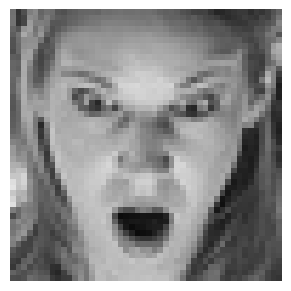

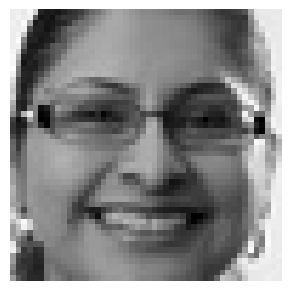

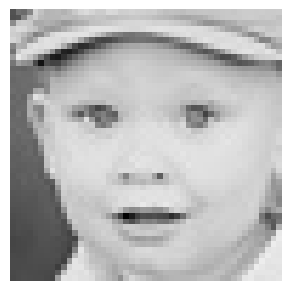

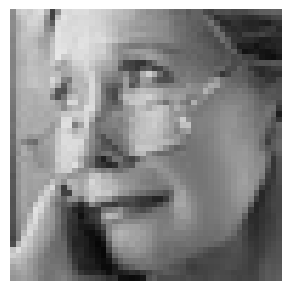

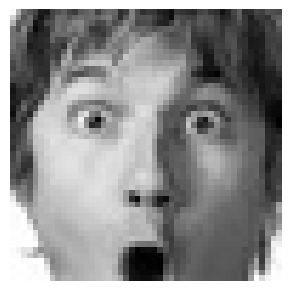

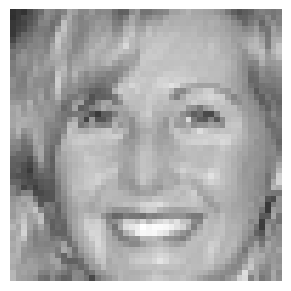

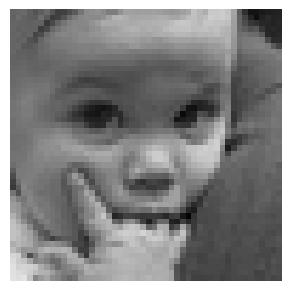

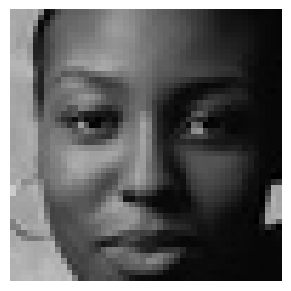

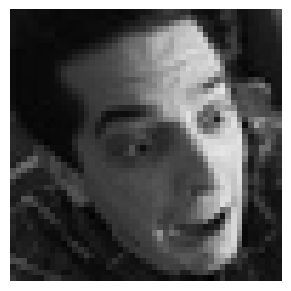

In [5]:
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i) #random number
    plt.imshow(cv2.imread(image));plt.axis('off')



**Preparing Data For Training**

In [6]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator(horizontal_flip= True)
train_generator = datagen_train.flow_from_directory("train/",
target_size=(img_size,img_size),
color_mode="grayscale",
batch_size=batch_size,
class_mode='categorical',shuffle=True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_validation.flow_from_directory("test/",
target_size=(img_size,img_size),
color_mode="grayscale",
batch_size=batch_size,
class_mode='categorical',shuffle=False)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [7]:
def Convolution(input_tensor,filters,kernal_size):# use to decrease image and find the feature
    x = Conv2D(filters=filters,kernel_size=(kernal_size,kernal_size),padding='same')(input_tensor)
    x = BatchNormalization()(x)# remove overfitting and increase the speed of training
    x = Activation('relu')(x)
    x = MaxPooling2D((2,2))(x)# decrease the dimensions of data
    x = Dropout(0.25)(x)# remove overfitting
    return x


In [8]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)
    return x

In [9]:
def model_fer(input_shape): #hyperparameter tuning
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,64,3)# 32 is the number of filters and (3,3) is the size of filter
    conv_2 = Convolution(inputs,128,5)# 64 is the number of filters and (5,5) is the size of filter
    conv_3 = Convolution(inputs,512,3)# 128 is the number of filters and (3,3) is the size of filter
    conv_4 = Convolution(inputs,512,3)
    flatten = Flatten()(conv_4)
    dense_1 = Dense_f(flatten,256)
    dense_2 = Dense_f(dense_1,512)
    output = Dense(7,activation='softmax')(dense_2)# output should be array of size 7  and softmax is used to get the probability of each class
    model = Model(inputs=[inputs],outputs=[output])
    
    model.compile(loss=['categorical_crossentropy'],optimizer=adam,metrics=['accuracy'])# loss is used to find the error and optimizer is used to reduce the error and metrics is used to find the accuracy of model
    return model

In [10]:
adam = Adam()
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 512)       5120      
                                                                 
 batch_normalization_3 (Batc  (None, 48, 48, 512)      2048      
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 48, 48, 512)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 512)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 24, 24, 512)       0     

**Initializing the Model**

In [11]:
epochs=50 # number of iteration
steps_per_epoch = train_generator.n //train_generator.batch_size # number of iteration in each epoch ''' (train_generatpr.n)it gives all the number of images'''
validation_steps = validation_generator.n//validation_generator.batch_size # we use // for int number
checkpoint = ModelCheckpoint("model_weights.weights.h5",monitor='val_accuracy',
                             save_weights_only=True,mode='max',verbose=1)   # it is used to save the model with highest accuracy 
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.0001)
callbacks = [checkpoint,reduce_lr] 

# Train the Model

In [12]:
history = model.fit(
    x=train_generator, #training data
    steps_per_epoch=steps_per_epoch, #number of iteration in each epoch
    epochs=epochs, #number of iteration
    validation_data = validation_generator, #validation data
    validation_steps = validation_steps, #number of iteration in each epoch
    callbacks = callbacks #save the model with highest accuracy
) 

Epoch 1/50
448/448 [==============================] - ETA: 0s - loss: 1.7173 - accuracy: 0.3426
Epoch 1: saving model to model_weights.weights.h5
448/448 [==============================] - 1077s 2s/step - loss: 1.7173 - accuracy: 0.3426 - val_loss: 1.7252 - val_accuracy: 0.2953 - lr: 0.0010
Epoch 2/50
448/448 [==============================] - ETA: 0s - loss: 1.4673 - accuracy: 0.4332
Epoch 2: saving model to model_weights.weights.h5
448/448 [==============================] - 879s 2s/step - loss: 1.4673 - accuracy: 0.4332 - val_loss: 1.6766 - val_accuracy: 0.3435 - lr: 0.0010
Epoch 3/50
448/448 [==============================] - ETA: 0s - loss: 1.3603 - accuracy: 0.4781
Epoch 3: saving model to model_weights.weights.h5
448/448 [==============================] - 1002s 2s/step - loss: 1.3603 - accuracy: 0.4781 - val_loss: 1.5165 - val_accuracy: 0.4134 - lr: 0.0010
Epoch 4/50
448/448 [==============================] - ETA: 0s - loss: 1.2887 - accuracy: 0.5085
Epoch 4: saving model to mode

**Model Evaluation**

In [ ]:
model.evaluate(validation_generator)

**Plotting Loss**

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) #plot the graph of loss
plt.title('model loss')    
plt.legend(['Train','Validation'],loc='upper left') #legend is used to show the label of each line
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,wspace=0.35,hspace=0.25) #adjust the plot


In [ ]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) #plot the graph of accuracy
plt.title('model accuracy')    
plt.legend(['Train','Validation'],loc='upper left') #legend is used to show the label of each line
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,wspace=0.35,hspace=0.25) #adjust the plot


**saving model**

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)